<a href="https://colab.research.google.com/github/Shivani14011/AIIMS_PROJ/blob/main/Plot_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

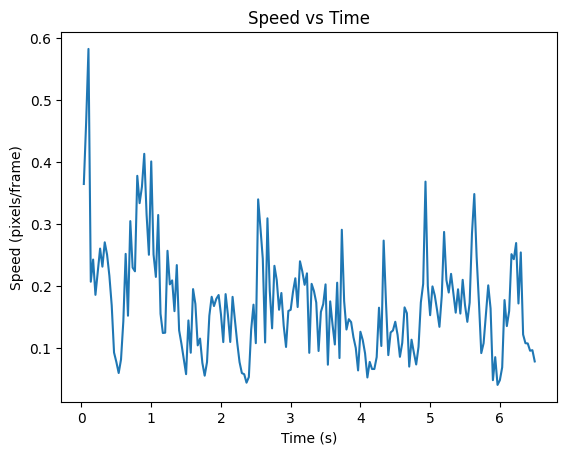

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cap = cv2.VideoCapture('vvideo.mp4')
#variables to store the frame count, time, and speed
frame_count = 0
time_list = []
speed_list = []
#previous frame and time
prev_frame = None
prev_time = 0
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    # If the frame is read successfully, process it
    if ret:
        #grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculate the optical flow using the Farneback algorithm
        if prev_frame is not None:
            flow = cv2.calcOpticalFlowFarneback(prev_frame, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            #speed from the optical flow
            speed = np.sqrt(flow[:, :, 0]**2 + flow[:, :, 1]**2).mean()
            time_list.append(frame_count / cap.get(cv2.CAP_PROP_FPS))
            speed_list.append(speed)
        # Update the previous frame and time
        prev_frame = gray
        prev_time = frame_count / cap.get(cv2.CAP_PROP_FPS)
        frame_count += 1
    else:
        break
cap.release()
#speed vs time graph
plt.plot(time_list, speed_list)
plt.xlabel('Time (s)')
plt.ylabel('Speed (pixels/frame)')
plt.title('Speed vs Time')
plt.show()